In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [2]:
import sys
sys.path.append('../')

In [3]:
import helper

In [4]:
datafile = '../Data/Enzyme_Dataset.txt'

In [5]:
X,y,enznames = helper.parseEnzymeFile(datafile)

In [6]:
# get all possible AAs for all enzymes

AAvalset = set()

for x in X:
    AAvalset.update(set(x))

AAvalset.add('-')

In [7]:
# Grouping the set according to their physicochemical characteristics

GAAset = {'G':'g1','A':'g1','V':'g1','L':'g1','M':'g1','I':'g1','F':'g2','Y':'g2','W':'g2',
                       'K':'g3','R':'g3','H':'g3', 'D':'g4', 'E':'g4','S':'g5','T':'g5','C':'g5','P':'g5',
                       'N':'g5','Q':'g5','X':'g6','-':'g6'}

In [8]:
# Create a one hot encoded array for AAs with their groups specified

OHEdict = {aa:num for aa, num in zip(sorted(AAvalset),range(len(AAvalset)))}

GAAlist = sorted(set(GAAset.values()))
GAAnum = range(len(OHEdict),len(OHEdict)+len(GAAlist))

for gaa,gnum in zip(GAAlist,GAAnum):
    OHEdict[gaa] = gnum

In [9]:
# Create a synthetic training set

AAs = [aa for i in range(2000) for aa in AAvalset]

In [10]:
Xtrain = []

for aa in AAs:
    ohe = [0 for i in range(len(OHEdict))]
    ohe[OHEdict[aa]] = 1
    ohe[OHEdict[GAAset[aa]]] = 1
    Xtrain.append(ohe)

In [11]:
Xtrain = np.array(Xtrain)

In [12]:
Xtrain.shape

(44000, 28)

In [46]:
# Autoencoder structure

n_inputs = len(OHEdict)

#Encoder structure
n_encoder0 = 25
n_encoder1 = 21
n_encoder2 = 16
n_encoder3 = 11
n_encoder4 = 6
n_encoder5 = 3

n_latent = 1

n_decoder6 = 3
n_decoder5 = 5
n_decoder4 = 7
n_decoder3 = 11
n_decoder2 = 14
n_decoder1 = 19
n_decoder0 = 24

# (n_encoder0,n_encoder1, 
#                                        n_encoder2, n_encoder3, 
#                                        n_encoder4,
#                                        n_encoder5, n_latent,n_decoder6,
#                                        n_decoder5,n_decoder4,
#                                        n_decoder3, n_decoder2, 
#                                        n_decoder1,n_decoder0)

hls = (25,21,15,11,7,3,1,3,7,11,15,23,26)

In [47]:
reg = MLPRegressor(hidden_layer_sizes=hls
                   ,batch_size=10000,
                   activation = 'tanh', solver = 'adam', learning_rate='adaptive',
                   learning_rate_init=0.001, max_iter=10000,tol=1e-7,verbose=True,
                  n_iter_no_change=500,alpha=0.01)

In [48]:
reg.fit(Xtrain,Xtrain)

Iteration 1, loss = 0.12511795
Iteration 2, loss = 0.09176945
Iteration 3, loss = 0.07159748
Iteration 4, loss = 0.05708975
Iteration 5, loss = 0.04741869
Iteration 6, loss = 0.04108684
Iteration 7, loss = 0.03678958
Iteration 8, loss = 0.03410334
Iteration 9, loss = 0.03254252
Iteration 10, loss = 0.03166547
Iteration 11, loss = 0.03107927
Iteration 12, loss = 0.03062632
Iteration 13, loss = 0.03028428
Iteration 14, loss = 0.03002753
Iteration 15, loss = 0.02983303
Iteration 16, loss = 0.02967268
Iteration 17, loss = 0.02952975
Iteration 18, loss = 0.02939687
Iteration 19, loss = 0.02927196
Iteration 20, loss = 0.02915232
Iteration 21, loss = 0.02903527
Iteration 22, loss = 0.02891979
Iteration 23, loss = 0.02880553
Iteration 24, loss = 0.02869301
Iteration 25, loss = 0.02858347
Iteration 26, loss = 0.02847518
Iteration 27, loss = 0.02837012
Iteration 28, loss = 0.02826751
Iteration 29, loss = 0.02816717
Iteration 30, loss = 0.02807030
Iteration 31, loss = 0.02797630
Iteration 32, los

Iteration 253, loss = 0.01531939
Iteration 254, loss = 0.01529678
Iteration 255, loss = 0.01534610
Iteration 256, loss = 0.01531477
Iteration 257, loss = 0.01524936
Iteration 258, loss = 0.01521866
Iteration 259, loss = 0.01517337
Iteration 260, loss = 0.01514081
Iteration 261, loss = 0.01510094
Iteration 262, loss = 0.01506140
Iteration 263, loss = 0.01502002
Iteration 264, loss = 0.01497332
Iteration 265, loss = 0.01492281
Iteration 266, loss = 0.01486656
Iteration 267, loss = 0.01480347
Iteration 268, loss = 0.01473191
Iteration 269, loss = 0.01465157
Iteration 270, loss = 0.01455999
Iteration 271, loss = 0.01447824
Iteration 272, loss = 0.01436654
Iteration 273, loss = 0.01422716
Iteration 274, loss = 0.01408327
Iteration 275, loss = 0.01392485
Iteration 276, loss = 0.01376117
Iteration 277, loss = 0.01359531
Iteration 278, loss = 0.01343587
Iteration 279, loss = 0.01329049
Iteration 280, loss = 0.01315669
Iteration 281, loss = 0.01303984
Iteration 282, loss = 0.01294662
Iteration 

Iteration 502, loss = 0.00884947
Iteration 503, loss = 0.00883707
Iteration 504, loss = 0.00882441
Iteration 505, loss = 0.00881399
Iteration 506, loss = 0.00887237
Iteration 507, loss = 0.00886243
Iteration 508, loss = 0.00882328
Iteration 509, loss = 0.00878330
Iteration 510, loss = 0.00877762
Iteration 511, loss = 0.00876055
Iteration 512, loss = 0.00874338
Iteration 513, loss = 0.00875050
Iteration 514, loss = 0.00879649
Iteration 515, loss = 0.00888036
Iteration 516, loss = 0.00887896
Iteration 517, loss = 0.00884962
Iteration 518, loss = 0.00879075
Iteration 519, loss = 0.00884748
Iteration 520, loss = 0.00878694
Iteration 521, loss = 0.00874476
Iteration 522, loss = 0.00869467
Iteration 523, loss = 0.00863860
Iteration 524, loss = 0.00860816
Iteration 525, loss = 0.00858161
Iteration 526, loss = 0.00856231
Iteration 527, loss = 0.00854671
Iteration 528, loss = 0.00853264
Iteration 529, loss = 0.00851803
Iteration 530, loss = 0.00850290
Iteration 531, loss = 0.00848867
Iteration 

Iteration 751, loss = 0.00515202
Iteration 752, loss = 0.00512483
Iteration 753, loss = 0.00509792
Iteration 754, loss = 0.00507145
Iteration 755, loss = 0.00504588
Iteration 756, loss = 0.00501925
Iteration 757, loss = 0.00499355
Iteration 758, loss = 0.00496700
Iteration 759, loss = 0.00494121
Iteration 760, loss = 0.00491615
Iteration 761, loss = 0.00489117
Iteration 762, loss = 0.00486631
Iteration 763, loss = 0.00484557
Iteration 764, loss = 0.00483469
Iteration 765, loss = 0.00504151
Iteration 766, loss = 0.00552641
Iteration 767, loss = 0.00506385
Iteration 768, loss = 0.00490311
Iteration 769, loss = 0.00481858
Iteration 770, loss = 0.00474801
Iteration 771, loss = 0.00469796
Iteration 772, loss = 0.00466461
Iteration 773, loss = 0.00463639
Iteration 774, loss = 0.00461120
Iteration 775, loss = 0.00458791
Iteration 776, loss = 0.00456550
Iteration 777, loss = 0.00454481
Iteration 778, loss = 0.00452564
Iteration 779, loss = 0.00450709
Iteration 780, loss = 0.00448884
Iteration 

Iteration 1000, loss = 0.00183434
Iteration 1001, loss = 0.00183067
Iteration 1002, loss = 0.00182587
Iteration 1003, loss = 0.00182156
Iteration 1004, loss = 0.00181713
Iteration 1005, loss = 0.00181284
Iteration 1006, loss = 0.00180846
Iteration 1007, loss = 0.00180431
Iteration 1008, loss = 0.00179936
Iteration 1009, loss = 0.00179452
Iteration 1010, loss = 0.00178947
Iteration 1011, loss = 0.00178465
Iteration 1012, loss = 0.00177958
Iteration 1013, loss = 0.00177432
Iteration 1014, loss = 0.00176888
Iteration 1015, loss = 0.00176351
Iteration 1016, loss = 0.00175749
Iteration 1017, loss = 0.00175157
Iteration 1018, loss = 0.00174549
Iteration 1019, loss = 0.00173930
Iteration 1020, loss = 0.00173281
Iteration 1021, loss = 0.00172605
Iteration 1022, loss = 0.00171900
Iteration 1023, loss = 0.00171206
Iteration 1024, loss = 0.00170483
Iteration 1025, loss = 0.00169673
Iteration 1026, loss = 0.00168856
Iteration 1027, loss = 0.00168035
Iteration 1028, loss = 0.00167187
Iteration 1029

Iteration 1241, loss = 0.00103522
Iteration 1242, loss = 0.00103519
Iteration 1243, loss = 0.00103511
Iteration 1244, loss = 0.00103503
Iteration 1245, loss = 0.00103503
Iteration 1246, loss = 0.00103497
Iteration 1247, loss = 0.00103505
Iteration 1248, loss = 0.00103503
Iteration 1249, loss = 0.00103510
Iteration 1250, loss = 0.00103507
Iteration 1251, loss = 0.00103493
Iteration 1252, loss = 0.00103515
Iteration 1253, loss = 0.00103508
Iteration 1254, loss = 0.00103503
Iteration 1255, loss = 0.00103504
Iteration 1256, loss = 0.00103489
Iteration 1257, loss = 0.00103494
Iteration 1258, loss = 0.00103507
Iteration 1259, loss = 0.00103505
Iteration 1260, loss = 0.00103495
Iteration 1261, loss = 0.00103475
Iteration 1262, loss = 0.00103487
Iteration 1263, loss = 0.00103480
Iteration 1264, loss = 0.00103472
Iteration 1265, loss = 0.00103481
Iteration 1266, loss = 0.00103486
Iteration 1267, loss = 0.00103473
Iteration 1268, loss = 0.00103490
Iteration 1269, loss = 0.00103475
Iteration 1270

Iteration 1482, loss = 0.00103338
Iteration 1483, loss = 0.00103326
Iteration 1484, loss = 0.00103323
Iteration 1485, loss = 0.00103340
Iteration 1486, loss = 0.00103326
Iteration 1487, loss = 0.00103320
Iteration 1488, loss = 0.00103363
Iteration 1489, loss = 0.00103333
Iteration 1490, loss = 0.00103370
Iteration 1491, loss = 0.00103370
Iteration 1492, loss = 0.00103351
Iteration 1493, loss = 0.00103319
Iteration 1494, loss = 0.00103345
Iteration 1495, loss = 0.00103391
Iteration 1496, loss = 0.00103714
Iteration 1497, loss = 0.00105614
Iteration 1498, loss = 0.00107728
Iteration 1499, loss = 0.00104722
Iteration 1500, loss = 0.00104780
Iteration 1501, loss = 0.00104766
Iteration 1502, loss = 0.00103760
Iteration 1503, loss = 0.00103883
Iteration 1504, loss = 0.00103434
Iteration 1505, loss = 0.00103637
Iteration 1506, loss = 0.00103367
Iteration 1507, loss = 0.00103412
Iteration 1508, loss = 0.00103370
Iteration 1509, loss = 0.00103325
Iteration 1510, loss = 0.00103387
Iteration 1511

Iteration 1723, loss = 0.00241654
Iteration 1724, loss = 0.00240203
Iteration 1725, loss = 0.00238746
Iteration 1726, loss = 0.00237322
Iteration 1727, loss = 0.00235956
Iteration 1728, loss = 0.00234526
Iteration 1729, loss = 0.00233146
Iteration 1730, loss = 0.00231773
Iteration 1731, loss = 0.00230445
Iteration 1732, loss = 0.00229099
Iteration 1733, loss = 0.00227753
Iteration 1734, loss = 0.00226454
Iteration 1735, loss = 0.00225150
Iteration 1736, loss = 0.00223909
Iteration 1737, loss = 0.00222688
Iteration 1738, loss = 0.00222213
Iteration 1739, loss = 0.00223460
Iteration 1740, loss = 0.00219938
Iteration 1741, loss = 0.00219886
Iteration 1742, loss = 0.00218688
Iteration 1743, loss = 0.00220321
Iteration 1744, loss = 0.00219160
Iteration 1745, loss = 0.00233348
Iteration 1746, loss = 0.00223094
Iteration 1747, loss = 0.00227198
Iteration 1748, loss = 0.00222657
Iteration 1749, loss = 0.00217241
Iteration 1750, loss = 0.00211617
Iteration 1751, loss = 0.00209617
Iteration 1752

Iteration 1964, loss = 0.00133796
Iteration 1965, loss = 0.00132268
Iteration 1966, loss = 0.00130837
Iteration 1967, loss = 0.00129428
Iteration 1968, loss = 0.00128101
Iteration 1969, loss = 0.00126834
Iteration 1970, loss = 0.00125607
Iteration 1971, loss = 0.00124431
Iteration 1972, loss = 0.00123302
Iteration 1973, loss = 0.00122229
Iteration 1974, loss = 0.00121214
Iteration 1975, loss = 0.00120234
Iteration 1976, loss = 0.00119309
Iteration 1977, loss = 0.00118435
Iteration 1978, loss = 0.00117608
Iteration 1979, loss = 0.00116825
Iteration 1980, loss = 0.00116112
Iteration 1981, loss = 0.00115394
Iteration 1982, loss = 0.00114730
Iteration 1983, loss = 0.00114114
Iteration 1984, loss = 0.00113536
Iteration 1985, loss = 0.00112987
Iteration 1986, loss = 0.00112475
Iteration 1987, loss = 0.00111995
Iteration 1988, loss = 0.00111552
Iteration 1989, loss = 0.00111129
Iteration 1990, loss = 0.00110756
Iteration 1991, loss = 0.00110368
Iteration 1992, loss = 0.00110014
Iteration 1993

Iteration 2205, loss = 0.00066878
Iteration 2206, loss = 0.00066375
Iteration 2207, loss = 0.00065876
Iteration 2208, loss = 0.00065374
Iteration 2209, loss = 0.00064879
Iteration 2210, loss = 0.00064367
Iteration 2211, loss = 0.00063863
Iteration 2212, loss = 0.00063361
Iteration 2213, loss = 0.00062847
Iteration 2214, loss = 0.00062338
Iteration 2215, loss = 0.00061843
Iteration 2216, loss = 0.00061313
Iteration 2217, loss = 0.00060800
Iteration 2218, loss = 0.00060283
Iteration 2219, loss = 0.00059766
Iteration 2220, loss = 0.00059253
Iteration 2221, loss = 0.00058758
Iteration 2222, loss = 0.00058473
Iteration 2223, loss = 0.00061830
Iteration 2224, loss = 0.00068054
Iteration 2225, loss = 0.00063801
Iteration 2226, loss = 0.00065429
Iteration 2227, loss = 0.00070995
Iteration 2228, loss = 0.00073002
Iteration 2229, loss = 0.00071723
Iteration 2230, loss = 0.00068958
Iteration 2231, loss = 0.00064093
Iteration 2232, loss = 0.00060719
Iteration 2233, loss = 0.00060706
Iteration 2234

Iteration 2446, loss = 0.00038920
Iteration 2447, loss = 0.00038286
Iteration 2448, loss = 0.00033638
Iteration 2449, loss = 0.00029761
Iteration 2450, loss = 0.00028560
Iteration 2451, loss = 0.00027182
Iteration 2452, loss = 0.00026264
Iteration 2453, loss = 0.00025947
Iteration 2454, loss = 0.00025732
Iteration 2455, loss = 0.00025539
Iteration 2456, loss = 0.00025399
Iteration 2457, loss = 0.00025305
Iteration 2458, loss = 0.00025271
Iteration 2459, loss = 0.00025235
Iteration 2460, loss = 0.00025217
Iteration 2461, loss = 0.00025208
Iteration 2462, loss = 0.00025202
Iteration 2463, loss = 0.00025196
Iteration 2464, loss = 0.00025192
Iteration 2465, loss = 0.00025189
Iteration 2466, loss = 0.00025187
Iteration 2467, loss = 0.00025185
Iteration 2468, loss = 0.00025183
Iteration 2469, loss = 0.00025182
Iteration 2470, loss = 0.00025181
Iteration 2471, loss = 0.00025180
Iteration 2472, loss = 0.00025179
Iteration 2473, loss = 0.00025178
Iteration 2474, loss = 0.00025177
Iteration 2475

Iteration 2687, loss = 0.00025040
Iteration 2688, loss = 0.00025040
Iteration 2689, loss = 0.00025039
Iteration 2690, loss = 0.00025039
Iteration 2691, loss = 0.00025038
Iteration 2692, loss = 0.00025038
Iteration 2693, loss = 0.00025038
Iteration 2694, loss = 0.00025042
Iteration 2695, loss = 0.00025101
Iteration 2696, loss = 0.00025862
Iteration 2697, loss = 0.00037161
Iteration 2698, loss = 0.00086199
Iteration 2699, loss = 0.00056087
Iteration 2700, loss = 0.00043224
Iteration 2701, loss = 0.00034463
Iteration 2702, loss = 0.00030665
Iteration 2703, loss = 0.00028860
Iteration 2704, loss = 0.00026854
Iteration 2705, loss = 0.00026683
Iteration 2706, loss = 0.00025802
Iteration 2707, loss = 0.00025581
Iteration 2708, loss = 0.00025356
Iteration 2709, loss = 0.00025229
Iteration 2710, loss = 0.00025186
Iteration 2711, loss = 0.00025127
Iteration 2712, loss = 0.00025106
Iteration 2713, loss = 0.00025076
Iteration 2714, loss = 0.00025068
Iteration 2715, loss = 0.00025056
Iteration 2716

MLPRegressor(activation='tanh', alpha=0.01, batch_size=10000,
             hidden_layer_sizes=(25, 21, 15, 11, 7, 3, 1, 3, 7, 11, 15, 23, 26),
             learning_rate='adaptive', max_iter=10000, n_iter_no_change=500,
             tol=1e-07, verbose=True)

In [49]:
testAA  = sorted(AAvalset)

def get_OHE_val(aa):
    ohe = [0 for i in range(len(OHEdict))]
    ohe[OHEdict[aa]] = 1
    ohe[OHEdict[GAAset[aa]]] = 1
    return ohe

Xtest = np.array(list(map(get_OHE_val,testAA)))


In [50]:
AApred = reg.predict(Xtest)

In [51]:
def predict_AArankings(predArr):
    AApredictionidx = np.argmax(predArr[:22])
    return sorted(AAvalset)[AApredictionidx]

In [52]:
list(map(predict_AArankings,AApred))

['-',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'X',
 'Y']

In [53]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def encode(x,layer):
    linear_layer = x*reg.coefs_[layer] + reg.intercepts_[layer]
    activation = tanh(linear_layer)
    return activation
    
    

def encoder(data,nlayers):
    data = np.asmatrix(data)
    
#     encoder0 = encode(data,0)
    
#     encoder1 = encode(encoder0,1)
#     encoder2 = encode(encoder1,2)
#     encoder3 = encode(encoder2,3)
#     encoder4 = encode(encoder3,4)
#     encoder5 = encode(encoder4,5)
    
    encoder = data
    
    for i in range(nlayers):
        encoder = encode(encoder,i)
    
    latent = encode(encoder,nlayers)
    
    return np.asarray(latent)
    
    
    
    
    
    

In [62]:
AA2Contdict = dict(zip(testAA,np.ravel(encoder(Xtest,6))))

In [55]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

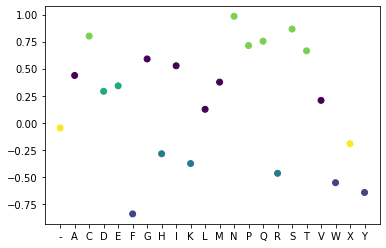

In [57]:
color = [int(GAAset[AAval][1]) for AAval in testAA]
plt.scatter(range(22),encoder(Xtest,6),c=color)
plt.xticks(range(22),sorted(AAvalset));

In [58]:
savedmodel = 'AEmodel.sav'
import pickle
pickle.dump(reg,open(savedmodel,'wb'))

In [64]:
enzdatafile = '../Data/Enzyme_aligned.txt'
X_aligned,y,enznames = helper.parseEnzymeFile(enzdatafile)

In [65]:
def autoencode(seq):
    x_autoencoded = []
    for aa in seq:
        x_autoencoded.append(AA2Contdict[aa])
    
    return np.array(x_autoencoded)
        

X_autoencoded = np.array(list(map(autoencode,X_aligned)))

In [69]:
y_enc = np.array(y)

In [323]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif

skbest = SelectKBest(score_func=f_classif)
skbest.fit(X_autoencoded,y_enc)

/storage/home/dzb5732/.conda/envs/thio-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [211 226 346 437] are constant.
  UserWarning)
/storage/home/dzb5732/.conda/envs/thio-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest()

In [324]:
diffmodelbest = []

with open('../Data/BestPosition.txt','r') as f:
    for lines in f:
        diffmodelbest.append(int(lines.strip()))

In [325]:
model_best = sorted(np.argsort(skbest.scores_)[:50])

In [326]:
len(diffmodelbest),len(model_best)

(45, 50)

In [327]:
set(model_best).intersection(diffmodelbest)

{89, 90, 101, 123, 165, 202, 248, 400, 460}

In [328]:
X_autoencoded

array([[-0.04855965, -0.04855965, -0.04855965, ..., -0.04855965,
        -0.04855965, -0.04855965],
       [-0.04855965, -0.04855965, -0.04855965, ..., -0.04855965,
        -0.04855965, -0.04855965],
       [-0.04855965, -0.04855965, -0.04855965, ..., -0.04855965,
        -0.04855965, -0.04855965],
       ...,
       [-0.04855965, -0.04855965,  0.37521005, ..., -0.04855965,
        -0.04855965, -0.04855965],
       [-0.04855965, -0.04855965,  0.37521005, ..., -0.04855965,
        -0.04855965, -0.04855965],
       [-0.04855965, -0.04855965,  0.37521005, ..., -0.04855965,
        -0.04855965, -0.04855965]])

In [329]:
X_select = X_autoencoded[:,model_best]

In [330]:
X_select.shape

(106, 50)

In [331]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [332]:
def balancing_function(X_tr,y_tr):
    values,counts = np.unique(y_tr,return_counts=True)
    label_count_dict = {l:c for l,c in zip(values,counts)}
    
    # get the max count
    max_count = max(label_count_dict.values())
    
    # for the labels with less max count, randomly select their index and append that index to the array
    
    for k,v in label_count_dict.items():
        if v<max_count:
            #get the indices with those values
            indices = np.where(y_tr==k)[0]
            
            # get how training set must be duplicated
            n_duplicate = max_count-v
            
            if n_duplicate>v:
                
                times_to_add = n_duplicate//v 
                    
                X_tr_k = X_tr[indices,:]
                
                for i in range(times_to_add):
                    X_tr = np.concatenate((X_tr,X_tr_k),axis=0)
                    y_tr = np.append(y_tr,np.array([k for i in range(v)]))
                
                remaining_times = n_duplicate-times_to_add*v
                
                random_indices = np.random.choice(indices,size=remaining_times)
                
                X_tr_extra = X_tr[random_indices,:]
                y_tr_extra = np.array([k for i in range(remaining_times)])
                
                X_tr = np.concatenate((X_tr,X_tr_extra),axis=0)
                y_tr = np.append(y_tr,y_tr_extra)
                
            else:
                
                remaining_times = n_duplicate
                
                random_indices = np.random.choice(indices,size=remaining_times)
                
                X_tr_extra = X_tr[random_indices,:]
                y_tr_extra = np.array([k for i in range(remaining_times)])
                
                X_tr = np.concatenate((X_tr,X_tr_extra),axis=0)
                y_tr = np.append(y_tr,y_tr_extra)
                
                
    return X_tr,y_tr

In [344]:
tracc = []
teacc = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_select, y_enc, test_size=0.25, random_state=i)

#    X_train,y_train = balancing_function(X_train,y_train)

    
    steps = [('pca',PCA(n_components=45)),('SVM',SVC(C=100,gamma='scale',kernel='rbf'))]
    pipe = Pipeline(steps)
    pipe.fit(X_train,y_train)
    ypredtrain = pipe.predict(X_train)
    ypredtest = pipe.predict(X_test)
    trainacc = accuracy_score(y_train,ypredtrain)
    testacc = accuracy_score(y_test,ypredtest)
    tracc.append(trainacc)
    teacc.append(testacc)
    if i%10==0:
        print(i)

0
10
20
30
40
50
60
70
80
90


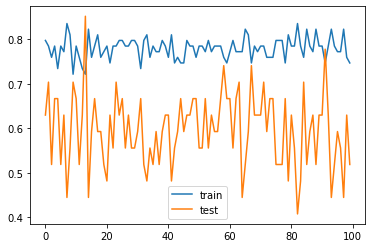

In [345]:
plt.plot(tracc,label='train')
plt.plot(teacc,label='test')
plt.legend()

In [352]:
np.argmin(teacc),np.argmax(teacc)

(82, 13)

In [347]:
np.mean(teacc),np.mean(tracc)

(0.5959259259259259, 0.779746835443038)

In [351]:
min(teacc),max(teacc)

(0.4074074074074074, 0.8518518518518519)

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y_enc, test_size=0.33, random_state=13)

In [354]:
np.unique(y_test,return_counts=True)

(array([1, 2, 3]), array([11,  5, 19]))

In [355]:
np.unique(y_train,return_counts=True)

(array([1, 2, 3]), array([26, 13, 32]))